## Absenteeism Analysis

The exercise will address absenteeism at a company during work time. 
The problem is that the business environment of today is more competitive than it used to be,this leads to increased pressure in the workplace. Therefore, it is reasonable to expect that unachievable business goals, and an elevated risk of unemployment can raise people's stress levels. Often, the continuous presence of such factors becomes detrimental to a person's health. Sometimes, this may result in minor illness, which of course, is not desired. However, it may happen that the employee develops a long-term condition, an example being depression. That being said, since we will be solving the problem from the point of view of the person in charge of productivity in the company, we won't focus on that facet of the problem. Rather, we'll look at predicting absenteeism from work, more precisely, we would like to know whether or not an employee can be expected to be missing for a specific number of hours in a given workday? Having such information in advance can improve our decision-making.
By reorganizing the work process in a way that will allow us to avoid a lack of productivity, and increase the quality of work generated in our firm. So, here's how we'll define absenteeism:

"The absence from work during normal working hours, resulting in temporary incapacity to execute regular working activity."

"Based on what information should we predict whether an employee's expected to be absent or not?

How would we measure absenteeism? Should we rather think about trying to predict excessive absenteeism?"

We will answer these and other questions, as we proceed with our analysis. The purpose of the business exercise will be to explore whether a person presenting certain characteristics is expected to be away from work at some point in time or not? In other words, we want to know for how many working hours an employee could be away from work, based on information such as how far they live from their workplace? How many children and pets they have? Do they have higher education? And so on.

## Data Preprocessing

In [1]:
#Importing dependencies 
import pandas as pd

In [2]:
#Reading data file 
read_csv_data=pd.read_csv('Absenteeism_data.csv')

In [3]:
read_csv_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [4]:
#Creating a copy of the dataset
df=read_csv_data.copy()

In [5]:
pd.options.display.max_rows= None
pd.options.display.max_columns= None

In [6]:
#Displaying the dataset
df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,3,23,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,10,22,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,20,23,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,14,19,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,1,22,13/07/2015,235,11,37,239.554,29,3,1,1,8


In [7]:
#Dsoplaying information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


#### It can be seen that there are no missing values

In [8]:
#Dropping ID coulumn which is a label or nominal data and not required for model training
df = df.drop(['ID'], axis = 1)
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Analysing Reason of Absence column

In [9]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

#### Reason code 20 is missing

### Getting dummy data for Reason of Absence

In [10]:
# Getting dummy data for reason of absenceand removing column which has no reason defined reason for absence vs-avis value 0
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True)
reason_columns

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Grouping the reason for absence

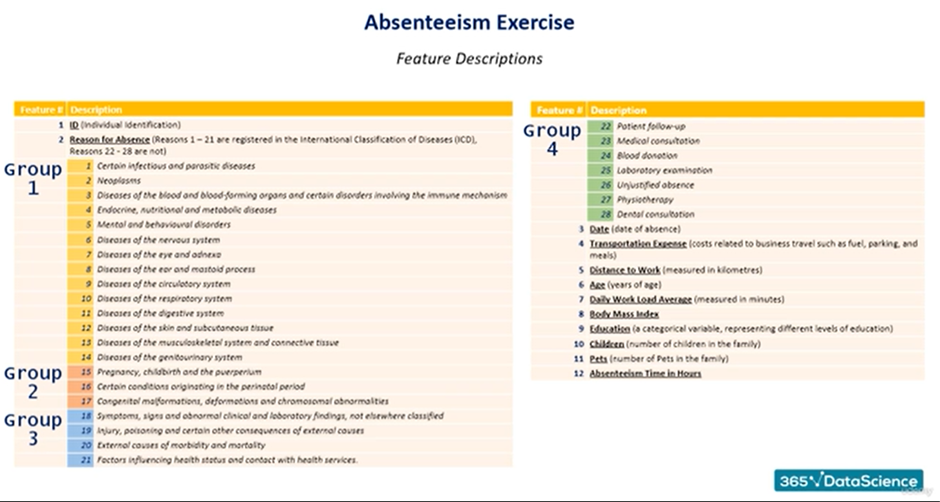

In [11]:
# Dropping Reason for Absence column
df=df.drop(['Reason for Absence'], axis = 1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [12]:
#Creating groups of reason of absence and keeping only max value of the reason for each group
reason_type_1 = reason_columns.loc[:,1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:,15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:,18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:,22:].max(axis=1)

In [13]:
reason_type_3

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     1
18     0
19     0
20     0
21     0
22     0
23     0
24     1
25     0
26     0
27     0
28     1
29     0
30     1
31     1
32     0
33     1
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     1
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     1
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     1
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     1
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     1
100    0
101    0
102    0
103    0
104    1
105    0
106    0
107    0
108    0
109    0
110    0
1

In [14]:
#Concatenating the reason group to the dataframe
df = pd.concat([df,reason_type_1, reason_type_2, reason_type_3, reason_type_4],axis=1)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [15]:
df.rename(columns = {0:'Reason_1', 1:'Reason_2',
                    2:'Reason_3',  3:'Reason_4'}, inplace = True)
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [16]:
df.columns

Index(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3',
       'Reason_4'],
      dtype='object')

In [17]:
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']
df=df[column_names_reordered]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [23]:
df_reason_mod = df.copy()

### Analysing Date column

In [24]:
type(df_reason_mod['Date'][0])

str

In [25]:
#Changing format to timestamp
df_reason_mod['Date']=pd.to_datetime(df_reason_mod['Date'], format='%d/%m/%Y')
df_reason_mod['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
5     2015-07-10
6     2015-07-17
7     2015-07-24
8     2015-07-06
9     2015-07-13
10    2015-07-20
11    2015-07-14
12    2015-07-15
13    2015-07-15
14    2015-07-15
15    2015-07-17
16    2015-07-17
17    2015-07-27
18    2015-07-30
19    2015-08-05
20    2015-08-12
21    2015-08-03
22    2015-08-10
23    2015-08-14
24    2015-08-17
25    2015-08-24
26    2015-08-04
27    2015-08-12
28    2015-08-19
29    2015-08-28
30    2015-08-17
31    2015-08-27
32    2015-08-27
33    2015-08-17
34    2015-08-17
35    2015-08-17
36    2015-08-04
37    2015-08-20
38    2015-08-21
39    2015-08-28
40    2015-09-01
41    2015-09-07
42    2015-09-01
43    2015-09-08
44    2015-09-09
45    2015-09-13
46    2015-09-14
47    2015-09-24
48    2015-09-04
49    2015-09-14
50    2015-09-21
51    2015-09-28
52    2015-09-08
53    2015-09-15
54    2015-09-22
55    2015-09-29
56    2015-09-16
57    2015-09-23
58    2015-09-

In [26]:
#Type of the first date for checking if formatted correctly
type(df_reason_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
# Extracting month value
list_month = []
for i in range(700):
    list_month.append(df_reason_mod['Date'][i].month)
list_month

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 

In [29]:
len(list_month)

700

In [30]:
# Appending month to the dataframe
df_reason_mod['Mont Value'] = list_month
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Mont Value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


In [31]:
# Extracting day of week
# Function to convert date to weekday
def date_to_weekday(date_value):
    return date_value.weekday()
#Calling function and assigning to new column
df_reason_mod['Day of the Week'] = df_reason_mod['Date'].apply(date_to_weekday)
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Mont Value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [32]:
df_reason_mod=df_reason_mod.drop(['Date'], axis = 1)
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Mont Value,Day of the Week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,3


### Analysing Education, Children, Pets

In [33]:
df_reason_mod['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [34]:
df_reason_mod['Children'].value_counts()

0    285
1    213
2    146
4     42
3     14
Name: Children, dtype: int64

In [35]:
df_reason_mod['Pets'].value_counts()

0    439
1    132
2     92
4     29
5      5
8      3
Name: Pets, dtype: int64

In [36]:
#Grouping Education
df_reason_mod['Education']=df_reason_mod['Education'].map({1:0, 2:1, 3:1, 4:1})
df_reason_mod.head(20)

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Mont Value,Day of the Week
0,0,0,0,1,289,36,33,239.554,30,0,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,0,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,0,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,0,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,0,2,1,2,7,3
5,0,0,0,1,179,51,38,239.554,31,0,0,0,2,7,4
6,0,0,0,1,361,52,28,239.554,27,0,1,4,8,7,4
7,0,0,0,1,260,50,36,239.554,23,0,4,0,4,7,4
8,0,0,1,0,155,12,34,239.554,25,0,2,0,40,7,0
9,0,0,0,1,235,11,37,239.554,29,1,1,1,8,7,0


In [37]:
df_preprocessed = df_reason_mod.copy()
df_preprocessed.to_csv('Absenteeism_preprocessed_final.csv', index=False)